<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://bitly.kr/TtC4WWlw 참고

In [0]:
# 데이터 불러오기
import pandas as pd 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data', header = None)

In [0]:
# wine 데이터셋 나누기 7:3
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0) # stratify는 dataset안의 클래스 비율설정을 함

# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

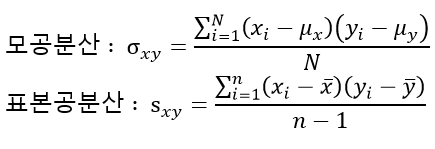

### 고윳값과 고유벡터
정방행렬 A에 대해 벡터 v와 실수r을 찾을 수 있다고 가정,
>Av = rv 

를 만족하는 r을 고윳값(eigenvalue) v를 고유벡터(eigenvector) 라고한다.

### 고윳값 고유벡터 구하는법
특성방정식(characteristic equation)의 해를 구하면됨
> det(A-rI) = 0 (I는 단위행렬)


In [0]:
# 넘파이의 cov를 사용하여 13개 요소에 대한 공분산행렬 생성
# linalg.eig를 사용하여 고윳값 분해
# http://bitly.kr/31n4UFSU 참조
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값 \n%s' %eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [0]:
np.cov(X_train_std.T)

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

## explained variance
설명된 분산은 전체 교윳값의 합에서 특정 고윳값의 비율로 나타냄

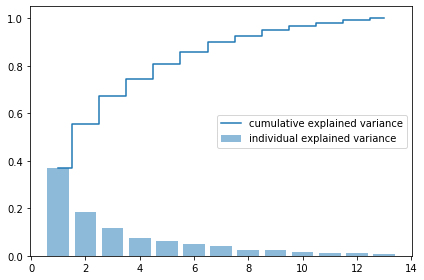

In [0]:
# 설명된 분산 시각화
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)] # eigen value를 역순으로 받아들이기
cum_var_exp = np.cumsum(var_exp) # var_exp누적합

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 특성변환

In [0]:
# 고윳값 고유벡터 튜플 리스트를 생성
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# sort by eigen value
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [0]:
# 투영행렬
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [0]:
X_train_std[0].dot(w) # x' = xW
X_train_pca = X_train_std.dot(w) # X' = XW 

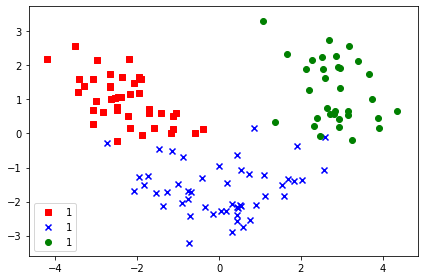

In [0]:
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c = c, label = 1, marker =m)

plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

## 사이킷런의 주성분 분석
로지스틱 회귀를 이용한 분류 
(plot_decision_region 함수 사용)

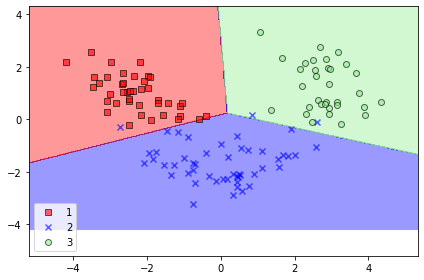

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  markers = ('s','x','o','^','v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정경계 그리기
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx1.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.6, c = cmap.colors[idx], edgecolor = 'black',
                marker = markers[idx], label = cl)

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

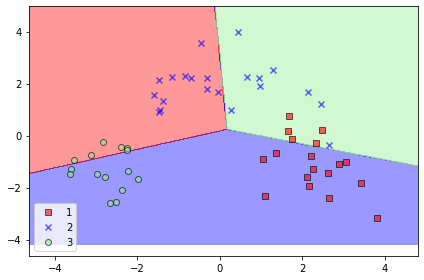

In [0]:
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

주성분 분산비율


In [0]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

# 선형판별분석을 통한 지도학습 데이터 압축

### 선형판별분석
1. 표준화전처리
2. 평균벡터 계산
3. 산포행렬 구성
4. 고유벡터 고윳값 계산
5. 정렬, 순서
6. 변환행렬구성과 투영

http://bitly.kr/MUF5UmLC5 

https://yamalab.tistory.com/32?category=711359참조

집단간 분산은 크게해야하고 집단내 분산은 작게해야 분류가 잘됨.


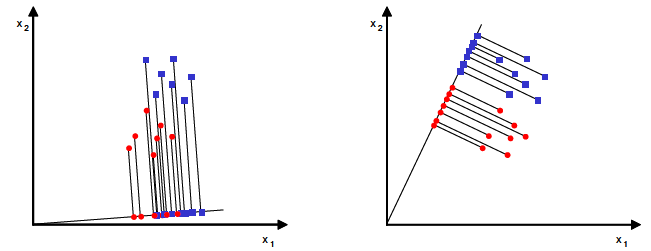

In [0]:
# 산포행렬 계산
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
  print('MV %s: %s \n' %(label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075] 

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253] 

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013] 



In [0]:
# 클래스 내의 산포행렬
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.zeros((d,d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter

print('클래스 내의 산포행렬: %s x %s' %(S_W.shape[0], S_W.shape[1]))

클래스 내의 산포행렬: 13 x 13


In [0]:
# 스케일이 조정된 클래스내의 산포행렬
S_W = np.zeros((13,13))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train == label].T, bias = True)
  S_W += class_scatter

In [0]:
# 클래스간 산포행렬
mean_overall = np.mean(X_train_std, axis = 0)
mean_overall = mean_overall.reshape(d,1) # 열벡터로 만드는 과정

d = 13 #특성개수
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d,1)
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

In [0]:
# inverse(S_W) * S_B의 고윳값 계산
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W.dot(S_B)))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k : k[0], reverse = True)
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])


내림차순의 고윳값:

66451724027185.984
66451724027185.984
62262934408803.68
62262934408803.68
54437536924944.52
54437536924944.52
31991844751842.156
31991844751842.156
26547367739772.688
24929063280042.656
24929063280042.656
0.012966165906206528
0.012966165906206528



Eigenvalues 
[4.8923 2.4664 1.4281 1.0123 0.8491 0.6018 0.5225 0.0841 0.3305 0.296
 0.1683 0.2143 0.24  ]


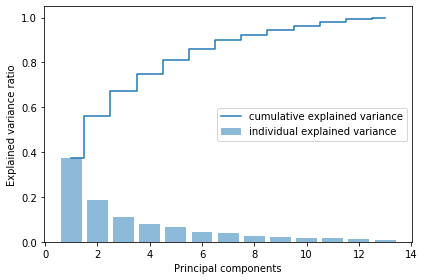

In [0]:
### data 불러오기
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()


### 데이터 전처리 - 데이터셋 분리
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
        
        
### 데이터 전처리 - 데이터 표준화 작업
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


### 공분산 행렬을 이용한 Eigendecomposition
import numpy as np

cov_mat = np.cov(X_train_std.T) # 공분산 행렬을 생성해주는 함수
# T는 Matrix의 T를 의미. 함수에 맞는 파라미터로 쓰기 위해 행렬을 돌려줌

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


### 에이겐벨류의 설명 분산 비율
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 에이겐벨류 / 에이겐벨류의 합 을 각각 구한다. 나온 각각의 값은 아이겐벨류의 설명 분산 비율이다.
# 즉, 어떤 에이겐벨류가 가장 설명력이 높은지를 비율로 나타내기 위한 것이다.

cum_var_exp = np.cumsum(var_exp) # 누적 합을 계산해주는 함수. -> 누적 백분위로 표현


### 에이겐벨류의 영향력을 그래프로 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

Matrix W:
 [[ 0.1467  0.5042]
 [-0.2422  0.2422]
 [-0.0299  0.287 ]
 [-0.2552 -0.0647]
 [ 0.1208  0.23  ]
 [ 0.3893  0.0936]
 [ 0.4233  0.0109]
 [-0.3063  0.0187]
 [ 0.3057  0.0304]
 [-0.0987  0.5453]
 [ 0.3003 -0.2792]
 [ 0.3682 -0.1744]
 [ 0.2926  0.3632]]


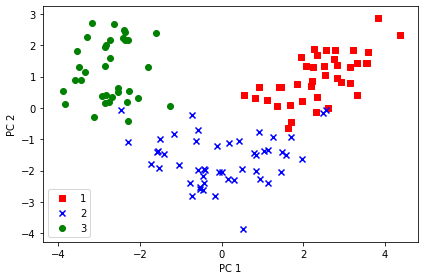

In [0]:
### 에이겐 쌍을 이용하여 투영행렬 생성
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# 에이겐 쌍 생성 -> 투플 자료형

eigen_pairs.sort(reverse=True) # 내림차순으로 정렬

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
# 투영행렬 W : 변수를 2차원으로 축소시키는 투영행렬.
# eigen_pairs의 0,1 번째만 -> 2개의 에이겐 쌍으로만 차원축소를 하겠다는 것.
# hstack -> 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여, 열의 수가 늘어난 np배열을 만든다.
# 1차원 배열끼리는 hstack 되지 않으므로 [:, np.newaxis]을 추가함.

print('Matrix W:\n', w)


### 투영행렬로 피처 압축
X_train_std[0].dot(w) # X_train_std[0] 행렬과 W 행렬의 곱(내적연산)

X_train_pca = X_train_std.dot(w) # 피처를 투영행렬에 곱한 값 -> 피처 축소된 결과


### 변환된 데이터를 그래프로 시각화
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()